<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/an_dijkstra_or_UCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uniform Cost Search, pretty much Dijkstra

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 1>/dev/null

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 195 (delta 106), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (195/195), 143.46 KiB | 6.52 MiB/s, done.
Resolving deltas: 100% (106/106), done.


In [2]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
import heapq as hq
import math

In [12]:
%%file 1.csv
#u,v,w
0,2,6
0,3,9
1,0,3
1,3,8
1,5,9
3,5,8
5,6,7
5,7,7
6,4,4
7,4,6

Overwriting 1.csv


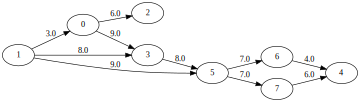

In [13]:
G = nx.read_weighted_edgelist('1.csv', create_using=nx.DiGraph, delimiter=',', nodetype=int)
gs.nx2gv(G, weighted=True)

Tip: heaps

In [6]:
import random
q = []
for _ in range(10):
  value = random.randint(1, 100)
  print(f"Inserting {value}")
  hq.heappush(q, value)

print(q)
while q:
  print(hq.heappop(q))

Inserting 89
Inserting 19
Inserting 42
Inserting 90
Inserting 43
Inserting 68
Inserting 12
Inserting 26
Inserting 27
Inserting 26
[12, 26, 19, 27, 26, 68, 42, 90, 43, 89]
12
19
26
26
27
42
43
68
89
90


In [7]:
q = []
for _ in range(10):
  priority = random.randint(1, 100)
  value = random.randint(1, 12124545)
  print(f"Inserting {value} with priority {priority}")
  hq.heappush(q, (priority, value))

for e in q:
  print(e)

print("Priority queue")
while q:
  print(hq.heappop(q))

Inserting 8998191 with priority 30
Inserting 10167305 with priority 20
Inserting 8303531 with priority 47
Inserting 7244214 with priority 86
Inserting 9481708 with priority 18
Inserting 7053219 with priority 90
Inserting 4860802 with priority 23
Inserting 8477042 with priority 16
Inserting 8577583 with priority 31
Inserting 9219976 with priority 60
(16, 8477042)
(18, 9481708)
(23, 4860802)
(20, 10167305)
(30, 8998191)
(90, 7053219)
(47, 8303531)
(86, 7244214)
(31, 8577583)
(60, 9219976)
Priority queue
(16, 8477042)
(18, 9481708)
(20, 10167305)
(23, 4860802)
(30, 8998191)
(31, 8577583)
(47, 8303531)
(60, 9219976)
(86, 7244214)
(90, 7053219)


## Dijkstra (or UCS) networkx version

In [8]:
def dijkstra(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path']    = -1
    G.nodes[u]['cost']    = math.inf

  G.nodes[s]['cost'] = 0
  q = [(0, s)]
  while q:
    g_u, u = hq.heappop(q)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          w_uv = G.edges[u, v]['weight']
          f_v  = g_u + w_uv
          g_v  = G.nodes[v]['cost']
          if f_v < g_v:
            G.nodes[v]['cost'] = f_v
            G.nodes[v]['path'] = u
            hq.heappush(q, (f_v, v))

  path = [0]*G.number_of_nodes()
  for v, info in G.nodes.data():
    path[v] = info['path']

  return path

[1, -1, 0, 1, 6, 1, 5, 5]


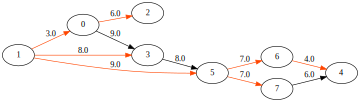

In [15]:
path = dijkstra(G, 1)
print(path)
gs.nx2gv(G, path=path, weighted=True)

In [20]:
a, b = nx.single_source_dijkstra(G, 1)
print("Paths by networkx")
for i in range(len(a)):
  print(f"Cost: {a[i]:2.0f} -> Path to {i}: {b[i]}")

Paths by networkx
Cost:  3 -> Path to 0: [1, 0]
Cost:  0 -> Path to 1: [1]
Cost:  9 -> Path to 2: [1, 0, 2]
Cost:  8 -> Path to 3: [1, 3]
Cost: 20 -> Path to 4: [1, 5, 6, 4]
Cost:  9 -> Path to 5: [1, 5]
Cost: 16 -> Path to 6: [1, 5, 6]
Cost: 16 -> Path to 7: [1, 5, 7]


## Simple adjacency list version

In [21]:
def dijkstraNoNx(G, s):
  n = len(G)
  path = [-1]*n
  visited = [False]*n
  cost = [math.inf]*n

  cost[s] = 0
  q = [(0, s)]
  while q:
    g_u, u = hq.heappop(q)
    if not visited[u]:
      visited[u] = True
      for v, w_uv in G[u]:
        if not visited[v]:
          f_v = g_u + w_uv
          g_v = cost[v]
          if f_v < g_v:
            cost[v] = f_v
            path[v] = u
            hq.heappush(q, (f_v, v))

  return path

[1, -1, 0, 1, 6, 1, 5, 5]


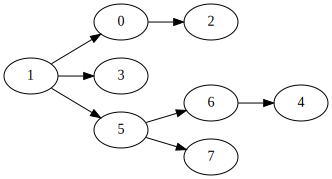

In [23]:
G = gs.wedges2adjlist('1.csv')
path = dijkstraNoNx(G, 1)
print(path)
gs.path2gv(path)